In [83]:
#pip install --upgrade --force-reinstall threadpoolctl

In [84]:
#pip install --upgrade bottleneck

# Random_search

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [86]:
data = pd.read_csv("split_10min_00000_20220628084436_inject.csv")

In [87]:
data.head(10)

,number,timestamp,protocol,packet,entropy,ip_src,ip_dst,ip_proto,port_src,port_dst,trans_payload_eight_bytes,trans_size,cluster,label,attack
0,1,1.656399e+09,TLS_RAW,dc15c857888b000c2906989208004500005b1742400080...,4.253058,172.16.90.5,172.16.90.202,6,3389.0,50356.0,197568693015,51.0,5,1,inject_rnd
1,2,1.656399e+09,RDPUDP_RAW,dc15c857888b000c290698920800450001141743000080...,5.350449,172.16.90.5,172.16.90.202,17,3389.0,51026.0,864911033833543724,248.0,3,0,NaN
2,3,1.656399e+09,RDPUDP_RAW,000c29069892dc15c857888b08004500006791e100007f...,4.289604,172.16.90.202,172.16.90.5,17,51026.0,3389.0,864691146895659394,75.0,4,1,inject_rnd
3,4,1.656399e+09,TCP_RAW,000c29069892dc15c857888b08004500002891e240007f...,3.543504,172.16.90.202,172.16.90.5,6,50356.0,3389.0,,NaN,9,0,NaN
4,5,1.656399e+09,RDPUDP_RAW,dc15c857888b000c290698920800450000281744000080...,3.390422,172.16.90.5,172.16.90.202,17,3389.0,51026.0,289576181453740076,12.0,3,0,NaN
5,6,1.656399e+09,S7COMM_RAW,000c29069892080006963a82080045000066a16300001e...,4.011795,172.16.90.8,172.16.90.5,6,102.0,58000.0,3639172391336148995,62.0,2,0,NaN
6,7,1.656399e+09,COTP_RAW,080006963a82000c2906989208004500002f3981400080...,3.519694,172.16.90.5,172.16.90.8,6,58000.0,102.0,263891498041347,7.0,0,1,inject_rnd
7,8,1.656399e+09,TCP_RAW,000c29069892080006963a82080045000028a16400001e...,3.402134,172.16.90.8,172.16.90.5,6,102.0,58000.0,,NaN,9,0,NaN
8,9,1.656399e+09,S7COMM_RAW,000c29069892080006963a82080045000083a16500001e...,4.231023,172.16.90.8,172.16.90.5,6,102.0,58000.0,3639172391822688259,91.0,2,1,inject_rnd
9,10,1.656399e+09,COTP_RAW,080006963a82000c2906989208004500002f3982400080...,3.507434,172.16.90.5,172.16.90.8,6,58000.0,102.0,263891498041347,7.0,0,0,NaN


In [88]:
data

,number,timestamp,protocol,packet,entropy,ip_src,ip_dst,ip_proto,port_src,port_dst,trans_payload_eight_bytes,trans_size,cluster,label,attack
0,1,1.656399e+09,TLS_RAW,dc15c857888b000c2906989208004500005b1742400080...,4.253058,172.16.90.5,172.16.90.202,6,3389.0,50356.0,197568693015,51.0,5,1,inject_rnd
1,2,1.656399e+09,RDPUDP_RAW,dc15c857888b000c290698920800450001141743000080...,5.350449,172.16.90.5,172.16.90.202,17,3389.0,51026.0,864911033833543724,248.0,3,0,NaN
2,3,1.656399e+09,RDPUDP_RAW,000c29069892dc15c857888b08004500006791e100007f...,4.289604,172.16.90.202,172.16.90.5,17,51026.0,3389.0,864691146895659394,75.0,4,1,inject_rnd
3,4,1.656399e+09,TCP_RAW,000c29069892dc15c857888b08004500002891e240007f...,3.543504,172.16.90.202,172.16.90.5,6,50356.0,3389.0,,NaN,9,0,NaN
4,5,1.656399e+09,RDPUDP_RAW,dc15c857888b000c290698920800450000281744000080...,3.390422,172.16.90.5,172.16.90.202,17,3389.0,51026.0,289576181453740076,12.0,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,30097,1.656399e+09,TCP_RAW,dc15c857888b000c29069892080045000028304f400080...,3.569466,172.16.90.5,172.16.90.202,6,3389.0,50356.0,,NaN,9,0,NaN
27866,30098,1.656399e+09,TLS_RAW,000c29069892dc15c857888b08004500005ab1bf40007f...,4.204765,172.16.90.202,172.16.90.5,6,50356.0,3389.0,193273725719,50.0,1,1,inject_rnd
27867,30099,1.656399e+09,TLS_RAW,000c29069892dc15c857888b08004500005ab1c040007f...,4.224436,172.16.90.202,172.16.90.5,6,50356.0,3389.0,193273725719,50.0,1,1,inject_rnd
27868,30100,1.656399e+09,TCP_RAW,dc15c857888b000c290698920800450000283050400080...,3.566810,172.16.90.5,172.16.90.202,6,3389.0,50356.0,,NaN,9,0,NaN


In [89]:
data.isnull().sum()

number                           0
timestamp                        0
protocol                         0
packet                           0
entropy                          0
ip_src                           0
ip_dst                           0
ip_proto                         0
port_src                        18
port_dst                        18
trans_payload_eight_bytes        0
trans_size                    8098
cluster                          0
label                            0
attack                       17839
dtype: int64

In [90]:
data[data.isnull().any(axis=1)]

,number,timestamp,protocol,packet,entropy,ip_src,ip_dst,ip_proto,port_src,port_dst,trans_payload_eight_bytes,trans_size,cluster,label,attack
1,2,1.656399e+09,RDPUDP_RAW,dc15c857888b000c290698920800450001141743000080...,5.350449,172.16.90.5,172.16.90.202,17,3389.0,51026.0,864911033833543724,248.0,3,0,NaN
3,4,1.656399e+09,TCP_RAW,000c29069892dc15c857888b08004500002891e240007f...,3.543504,172.16.90.202,172.16.90.5,6,50356.0,3389.0,,NaN,9,0,NaN
4,5,1.656399e+09,RDPUDP_RAW,dc15c857888b000c290698920800450000281744000080...,3.390422,172.16.90.5,172.16.90.202,17,3389.0,51026.0,289576181453740076,12.0,3,0,NaN
5,6,1.656399e+09,S7COMM_RAW,000c29069892080006963a82080045000066a16300001e...,4.011795,172.16.90.8,172.16.90.5,6,102.0,58000.0,3639172391336148995,62.0,2,0,NaN
7,8,1.656399e+09,TCP_RAW,000c29069892080006963a82080045000028a16400001e...,3.402134,172.16.90.8,172.16.90.5,6,102.0,58000.0,,NaN,9,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27857,30089,1.656399e+09,TLS_RAW,000c29069892dc15c857888b080045000053b1b940007f...,4.109077,172.16.90.202,172.16.90.5,6,50356.0,3389.0,163208954647,43.0,1,0,NaN
27859,30091,1.656399e+09,TCP_RAW,dc15c857888b000c29069892080045000028304d400080...,3.570582,172.16.90.5,172.16.90.202,6,3389.0,50356.0,,NaN,9,0,NaN
27862,30094,1.656399e+09,TCP_RAW,dc15c857888b000c29069892080045000028304e400080...,3.557096,172.16.90.5,172.16.90.202,6,3389.0,50356.0,,NaN,9,0,NaN
27865,30097,1.656399e+09,TCP_RAW,dc15c857888b000c29069892080045000028304f400080...,3.569466,172.16.90.5,172.16.90.202,6,3389.0,50356.0,,NaN,9,0,NaN


In [91]:
data.duplicated().any().sum()

0

In [92]:
data['attack'].unique()

array(['inject_rnd', nan], dtype=object)

In [93]:
data['label'].unique()

array([1, 0], dtype=int64)

In [94]:
import classifier

X_test_raw = data['packet']
mode = 'count'
n = 1
ngram_len = 3
smoothing = False
# n-gram features:
X = classifier.prepare_input(X_test_raw, mode, n, ngram_len, smoothing)
y_true = data['label'].apply(lambda l: 1 if l == 0 else -1)



In [95]:
X

<27870x256 sparse matrix of type '<class 'numpy.int32'>'
	with 1781067 stored elements in List of Lists format>

In [96]:
y_true

0       -1
1        1
2       -1
3        1
4        1
        ..
27865    1
27866   -1
27867   -1
27868    1
27869   -1
Name: label, Length: 27870, dtype: int64

In [97]:
from joblib import load

with open('estimator.pkl', 'rb') as f:
    if_model = load(f)

print(if_model)

Pipeline(steps=[('isolationforest',
                 IsolationForest(max_samples=0.7261800060284889,
                                 n_estimators=138, n_jobs=10,
                                 random_state=1))])


In [98]:
from joblib import load

with open('estimator2.pkl', 'rb') as f:
    lof_model = load(f)

print(lof_model)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('localoutlierfactor',
                 LocalOutlierFactor(contamination=0.00249325945254849,
                                    n_neighbors=30, novelty=True))])


C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator MaxAbsScaler from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LocalOutlierFactor from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. F

In [99]:
from joblib import load

with open('estimator3.pkl', 'rb') as f:
    svm_model = load(f)

print(svm_model)   

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('nystroem',
                 Nystroem(gamma=0.022197605347782097, n_components=150,
                          random_state=1)),
                ('sgdoneclasssvm',
                 SGDOneClassSVM(eta0=0.026168450059943886,
                                learning_rate='constant',
                                nu=0.16042993366325922, random_state=1,
                                tol=1e-06))])


C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator Nystroem from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator SGDOneClassSVM from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [100]:
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [101]:
# Combine predictions

if_preds = if_model.predict(X)
lof_preds = lof_model.predict(X)
svm_preds = svm_model.predict(X)
X_meta = pd.DataFrame({ 'IF': if_preds,'SVM': svm_preds,'LOF' : lof_preds})

In [102]:
# Train meta-classifier
meta_classifier = LogisticRegression(C=1.0, penalty='l2')
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_meta, y_true, test_size=0.2, random_state=42)


In [103]:
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga']
}

In [104]:

# Initialize the LogisticRegression model
log_reg = LogisticRegression()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_meta, y_train_meta)

# Get the best model and its parameters
best_meta_classifier = random_search.best_estimator_
print("Best hyperparameters for LogisticRegression: ", random_search.best_params_)

C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best hyperparameters for LogisticRegression:  {'solver': 'saga', 'penalty': 'l2', 'C': 0.0006951927961775605}


C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "C:\Users\IRFAN\anaconda3\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super(

In [105]:
# Train the meta-classifier with the best hyperparameters
best_meta_classifier.fit(X_train_meta, y_train_meta)

# Compute weights
meta_weights = best_meta_classifier.coef_[0]
print("Weights: ", meta_weights)

Weights:  [0.27749178 0.455438   0.17045933]


In [106]:
# Optimize threshold
best_threshold = 0.5  # Default threshold
best_f1 = 0.0
for threshold in [i / 10.0 for i in range(1, 10)]:
    combined_preds = svm_preds * meta_weights[2] + if_preds * meta_weights[2] + lof_preds * meta_weights[2]
    combined_preds_binary = [1 if pred >= threshold else -1 for pred in combined_preds]
    f1 = f1_score(y_true, combined_preds_binary)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

In [107]:
# Generate final predictions
combined_preds = svm_preds * meta_weights[2] + if_preds * meta_weights[2] + lof_preds * meta_weights[2]
combined_preds_binary = [1 if pred >= best_threshold else -1 for pred in combined_preds]

In [108]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# Evaluate performance
ensemble_ran_f1 = f1_score(y_true, combined_preds_binary)
svm_f1 = f1_score(y_true, svm_preds)
if_f1 = f1_score(y_true, if_preds)
lof_f1 = f1_score(y_true, lof_preds)
ensemble_precision = precision_score(y_true, combined_preds_binary)
ensemble_recall = recall_score(y_true, combined_preds_binary)

In [109]:
# Print results
print("F1-score of the SVM model:", svm_f1)
print("F1-score of the IF model:", if_f1)
print("F1-score of the LOF model:", lof_f1)
print("Best F1-score of the ensemble model:", ensemble_ran_f1)
print("Best Threshold:", best_threshold)
print('Weights: ', meta_weights)

F1-score of the SVM model: 0.8060776797672378
F1-score of the IF model: 0.7981550826559503
F1-score of the LOF model: 0.7877512131350957
Best F1-score of the ensemble model: 0.8053607388375806
Best Threshold: 0.2
Weights:  [0.27749178 0.455438   0.17045933]


In [112]:
# Filtering None values
final_preds = [p for p in combined_preds_binary if p is not None]
final_y = [y_true[i] for i, p in enumerate(combined_preds_binary) if p is not None]

# Evaluating performance
ensemble_ran_f1 = f1_score(final_y, final_preds, pos_label=1, average='binary')
ensemble_accuracy = accuracy_score(final_y, final_preds)
ensemble_precision = precision_score(final_y, final_preds, pos_label=1, average='binary')
ensemble_recall = recall_score(final_y, final_preds, pos_label=1, average='binary')

print("Best F1-score of the ensemble model:", ensemble_ran_f1)
print("Best Accuracy of the ensemble model:", ensemble_accuracy)
print("Best Precision of the ensemble model:", ensemble_precision)
print("Best Recall of the ensemble model:", ensemble_recall)
print("Best Threshold:", best_threshold)
print('Weights: ', meta_weights)

Best F1-score of the ensemble model: 0.8053607388375806
Best Accuracy of the ensemble model: 0.6982777179763187
Best Precision of the ensemble model: 0.6858933922094307
Best Recall of the ensemble model: 0.9752228263916138
Best Threshold: 0.2
Weights:  [0.27749178 0.455438   0.17045933]


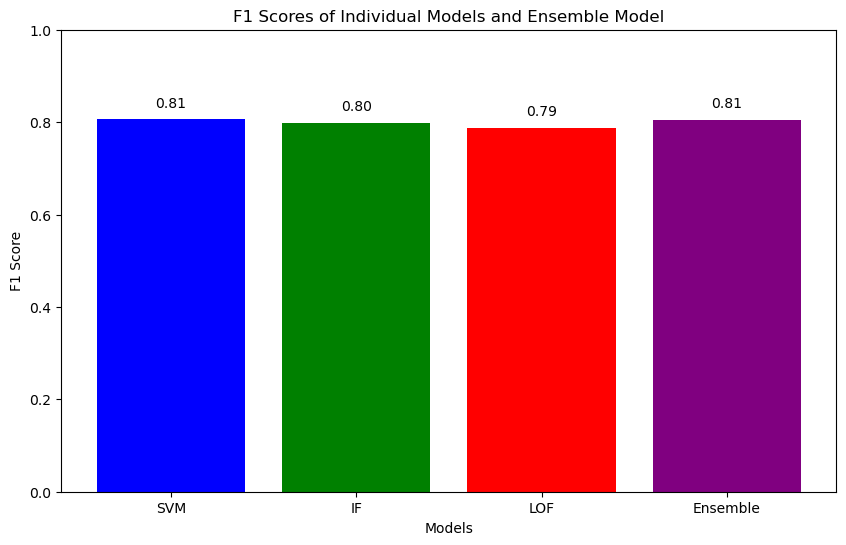

In [113]:
# Plotting the F1 scores
models = ['SVM', 'IF', 'LOF', 'Ensemble']
f1_scores = [svm_f1, if_f1, lof_f1, ensemble_ran_f1]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Individual Models and Ensemble Model')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()

#  "GA" (Genetic Algorithm Method)

In [29]:
import numpy as np
from deap import base, creator, tools, algorithms
# Define the fitness function
def evaluate_weights(individual):
    weights = individual
    combined_preds = X_val_meta['SVM'] * weights[0] + X_val_meta['IF'] * weights[1] + X_val_meta['LOF'] * weights[2]
    combined_preds_binary = [1 if pred >= 0.5 else -1 for pred in combined_preds]
    f1 = f1_score(y_val_meta, combined_preds_binary)
    return -f1,  # Minimize the negative F1-score

In [30]:
# Set up the GA
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_weights)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [31]:
#Run the GA
pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.2, ngen=200, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg      	std      	min      	max
0  	500   	-0.792776	0.0945092	-0.806063	-0 
1  	339   	-0.800467	0.0622026	-0.806063	-0 
2  	354   	-0.805751	0.000704322	-0.806063	-0.803043
3  	337   	-0.805894	0.00114365 	-0.806063	-0.788107
4  	321   	-0.805967	0.000865155	-0.806063	-0.788107
5  	327   	-0.805995	0.000368756	-0.806063	-0.803827
6  	323   	-0.805964	0.00044739 	-0.806063	-0.803137
7  	330   	-0.80599 	0.000383375	-0.806063	-0.803827
8  	333   	-0.806015	0.000314476	-0.806063	-0.803827
9  	348   	-0.806023	0.000282277	-0.806063	-0.803827
10 	348   	-0.80598 	0.000855057	-0.806063	-0.788107
11 	353   	-0.805972	0.000785283	-0.806063	-0.7902  
12 	332   	-0.80598 	0.000778895	-0.806063	-0.7902  
13 	344   	-0.805995	0.000756067	-0.806063	-0.7902  
14 	341   	-0.806024	0.000282736	-0.806063	-0.803827
15 	339   	-0.805947	0.00116982 	-0.806063	-0.788107
16 	314   	-0.806044	0.000199491	-0.806063	-0.803827
17 	316   	-0.805995	0.000842793	-0.806063	-0.788107
18 	359   	-0.806

In [32]:
#best weights
best_weights = hof[0]
print("Best Weights:", best_weights)

Best Weights: [0.2796299462117039, 0.001296490970678077, 0.35566641346653327]


In [33]:
# Generate final predictions
combined_preds = X_meta['SVM'] * best_weights[2] + X_meta['IF'] * best_weights[1] + X_meta['LOF'] * best_weights[2]
combined_preds_binary = [1 if pred >= 0.5 else -1 for pred in combined_preds]

In [34]:
# Evaluate performance

svm_f1 = f1_score(y_true, svm_preds)
if_f1 = f1_score(y_true, if_preds)
lof_f1 = f1_score(y_true, lof_preds)

# Print results
print("F1-score of the SVM model:", svm_f1)
print("F1-score of the IF model:", if_f1)
print("F1-score of the LOF model:", lof_f1)


F1-score of the SVM model: 0.8060776797672378
F1-score of the IF model: 0.7981550826559503
F1-score of the LOF model: 0.7877512131350957
F1-score of the ensemble model: 0.8060695780903036


In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
ensemble_precision = precision_score(y_true, combined_preds_binary)
ensemble_recall = recall_score(y_true, combined_preds_binary)

In [37]:
conf_matrix = confusion_matrix(y_true, combined_preds_binary)
print("Confusion Matrix of the ensemble model:\n", conf_matrix)

Confusion Matrix of the ensemble model:
 [[ 2062  7969]
 [  415 17424]]


In [115]:
# Filtering None values
final_preds = [p for p in combined_preds_binary if p is not None]
final_y = [y_true[i] for i, p in enumerate(combined_preds_binary) if p is not None]

# Evaluating performance
ensemble_ga_f1 = f1_score(final_y, final_preds, pos_label=1, average='binary')
ensemble_accuracy = accuracy_score(final_y, final_preds)
ensemble_precision = precision_score(final_y, final_preds, pos_label=1, average='binary')
ensemble_recall = recall_score(final_y, final_preds, pos_label=1, average='binary')

print("Best F1-score of the ensemble model:", ensemble_ga_f1)
print("Best Accuracy of the ensemble model:", ensemble_accuracy)
print("Best Precision of the ensemble model:", ensemble_precision)
print("Best Recall of the ensemble model:", ensemble_recall)
print("Best Threshold:", best_threshold)
print('Weights: ', meta_weights)

Best F1-score of the ensemble model: 0.8053607388375806
Best Accuracy of the ensemble model: 0.6982777179763187
Best Precision of the ensemble model: 0.6858933922094307
Best Recall of the ensemble model: 0.9752228263916138
Best Threshold: 0.2
Weights:  [0.27749178 0.455438   0.17045933]


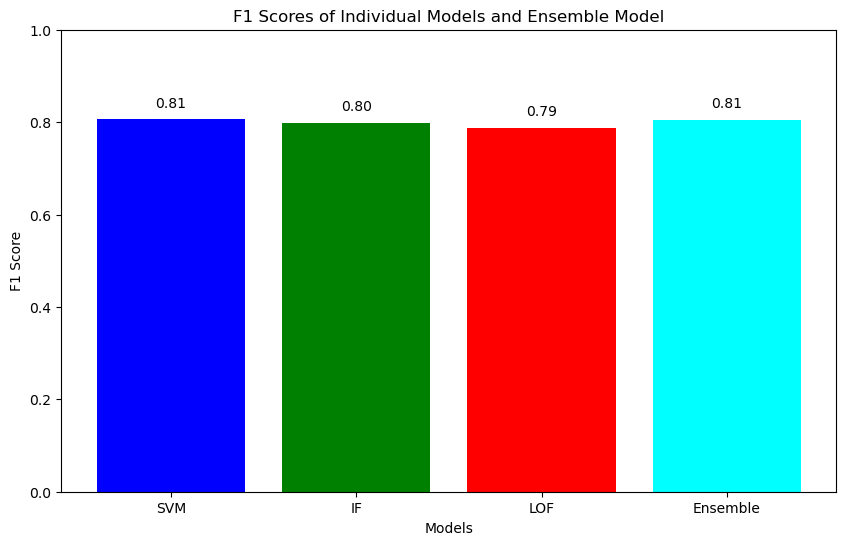

In [123]:
# Plotting the F1 scores
models = ['SVM', 'IF', 'LOF', 'Ensemble']
f1_scores = [svm_f1, if_f1, lof_f1, ensemble_ga_f1]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Individual Models and Ensemble Model')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# Grid search

In [40]:
# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_meta), y=y_train_meta)
class_weight_dict = dict(zip(np.unique(y_train_meta), class_weights))

In [41]:
def train_meta_classifier(config, X_train_meta, y_train_meta, X_val_meta, y_val_meta):
    meta_classifier = LogisticRegression(**config, class_weight=class_weight_dict)
    meta_classifier.fit(X_train_meta, y_train_meta)
    val_preds = meta_classifier.predict(X_val_meta)
    val_f1 = f1_score(y_val_meta, val_preds)
    return {"f1": val_f1}

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_meta, y_train_meta)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [43]:

# Train the meta-classifier with the best hyperparameters
meta_classifier = LogisticRegression(**best_params, class_weight=class_weight_dict)
meta_classifier.fit(X_train_meta, y_train_meta)

LogisticRegression(C=0.001,
                   class_weight={-1: 1.3895051726286924, 1: 0.7810551390737757})

In [44]:
# Compute weights
meta_weights = meta_classifier.coef_[0]
combined_preds = svm_preds * meta_weights[0] + if_preds * meta_weights[1] + lof_preds * meta_weights[2]

best_threshold = None
best_f1 = 0.0
for threshold in [i / 10.0 for i in range(1, 10)]:
    combined_preds_binary = [1 if pred >= threshold else -1 for pred in combined_preds]
    f1 = f1_score(y_true, combined_preds_binary)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

combined_preds_binary = [1 if pred >= best_threshold else -1 for pred in combined_preds]

In [116]:
# Filtering None values
final_preds = [p for p in combined_preds_binary if p is not None]
final_y = [y_true[i] for i, p in enumerate(combined_preds_binary) if p is not None]

# Evaluating performance
ensemble_grd_f1 = f1_score(final_y, final_preds, pos_label=1, average='binary')
ensemble_accuracy = accuracy_score(final_y, final_preds)
ensemble_precision = precision_score(final_y, final_preds, pos_label=1, average='binary')
ensemble_recall = recall_score(final_y, final_preds, pos_label=1, average='binary')

print("Best F1-score of the ensemble model:", ensemble_grd_f1)
print("Best Accuracy of the ensemble model:", ensemble_accuracy)
print("Best Precision of the ensemble model:", ensemble_precision)
print("Best Recall of the ensemble model:", ensemble_recall)
print("Best Threshold:", best_threshold)
print('Weights: ', meta_weights)

Best F1-score of the ensemble model: 0.8053607388375806
Best Accuracy of the ensemble model: 0.6982777179763187
Best Precision of the ensemble model: 0.6858933922094307
Best Recall of the ensemble model: 0.9752228263916138
Best Threshold: 0.2
Weights:  [0.27749178 0.455438   0.17045933]


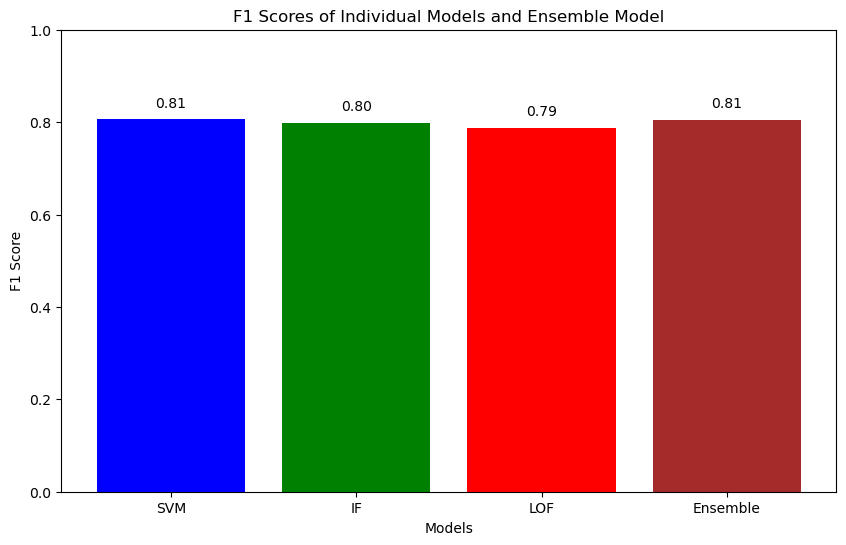

In [121]:
# Plotting the F1 scores
models = ['SVM', 'IF', 'LOF', 'Ensemble']
f1_scores = [svm_f1, if_f1, lof_f1, ensemble_grd_f1]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'brown'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Individual Models and Ensemble Model')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# F1 Scores of the ensemblers

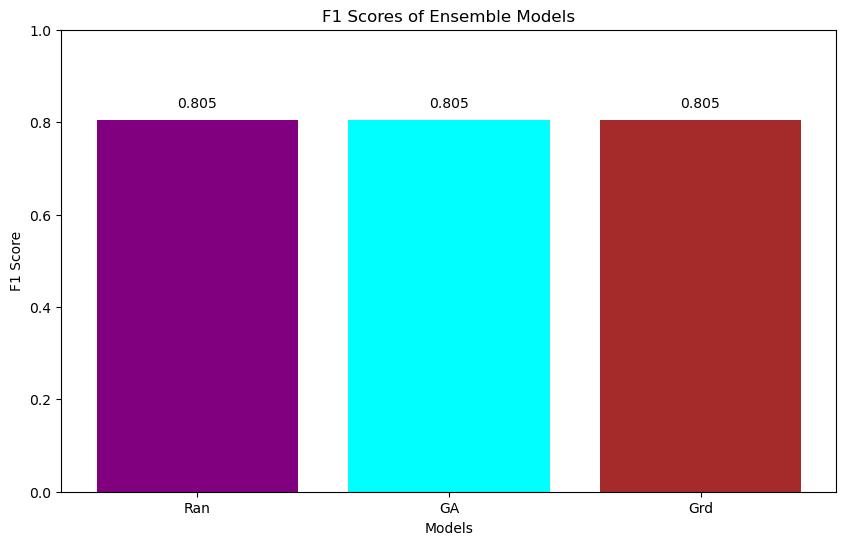

In [136]:
models = ['Ran', 'GA', 'Grd']
f1_scores = [ensemble_ran_f1, ensemble_ga_f1 , ensemble_grd_f1]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['purple', 'cyan', 'brown'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Ensemble Models')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
plt.show()

# bayesian-optimization

In [137]:

from bayes_opt import BayesianOptimization

svm_preds = svm_model.predict(X)
if_preds = if_model.predict(X)
lof_preds = lof_model.predict(X)

X_meta = pd.DataFrame({'SVM': svm_preds, 'IF': if_preds, 'LOF': lof_preds})
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_meta, y_true, test_size=0.2, random_state=42)

def ensemble_f1_score(w1, w2, w3):
    combined_preds = w1 * svm_preds + w2 * if_preds + w3 * lof_preds
    combined_preds_binary = [1 if pred >= 0 else -1 for pred in combined_preds]
    return f1_score(y_true, combined_preds_binary)

#bounds of the weights
pbounds = {'w1': (0, 10), 'w2': (0, 10), 'w3': (0, 10)}

optimizer = BayesianOptimization(
    f=ensemble_f1_score,
    pbounds=pbounds,
    random_state=42
)

# Perform optimization
optimizer.maximize(init_points=10, n_iter=50)

#best weights
best_weights = optimizer.max['params']
w1, w2, w3 = best_weights['w1'], best_weights['w2'], best_weights['w3']

# Recompute the final F1 score 
combined_preds = w1 * svm_preds + w2 * if_preds + w3 * lof_preds
combined_preds_binary = [1 if pred >= 0 else -1 for pred in combined_preds]
ensemble_f1 = f1_score(y_true, combined_preds_binary)

print("Best Weights from Bayesian Optimization:", best_weights)
print("Best F1-score of the ensemble model:", ensemble_f1)


|   iter    |  target   |    w1     |    w2     |    w3     |
-------------------------------------------------------------
| 1         | 0.8046    | 3.745     | 9.507     | 7.32      |
| 2         | 0.8061    | 5.987     | 1.56      | 1.56      |
| 3         | 0.7982    | 0.5808    | 8.662     | 6.011     |
| 4         | 0.7878    | 7.081     | 0.2058    | 9.699     |
| 5         | 0.8061    | 8.324     | 2.123     | 1.818     |
| 6         | 0.7878    | 1.834     | 3.042     | 5.248     |
| 7         | 0.8046    | 4.319     | 2.912     | 6.119     |
| 8         | 0.8046    | 1.395     | 2.921     | 3.664     |
| 9         | 0.7982    | 4.561     | 7.852     | 1.997     |
| 10        | 0.7982    | 5.142     | 5.924     | 0.4645    |
| 11        | 0.8046    | 1.513     | 2.847     | 3.76      |
| 12        | 0.8061    | 7.156     | 1.841     | 1.69      |
| 13        | 0.8061    | 7.503     | 1.612     | 3.06      |
| 14        | 0.8061    | 6.324     | 2.731     | 2.752     |
| 15    

# differential_evolution

In [138]:
from scipy.optimize import differential_evolution
def ensemble_f1_score(weights):
    w1, w2, w3 = weights
    combined_preds = w1 * svm_preds + w2 * if_preds + w3 * lof_preds
    combined_preds_binary = [1 if pred >= 0 else -1 for pred in combined_preds]
    return -f1_score(y_true, combined_preds_binary)  # Negative because differential_evolution minimizes

# bounds of the weights
bounds = [(0, 1), (0, 1), (0, 1)]

result = differential_evolution(ensemble_f1_score, bounds, strategy='best1bin', maxiter=100, popsize=15, tol=0.01)

# Extract the best weights
best_weights = result.x
w1, w2, w3 = best_weights

#final F1 score using the best weights
combined_preds = w1 * svm_preds + w2 * if_preds + w3 * lof_preds
combined_preds_binary = [1 if pred >= 0 else -1 for pred in combined_preds]
ensemble_f1 = f1_score(y_true, combined_preds_binary)

print("Best Weights from Differential Evolution:", best_weights)
print("Best F1-score of the ensemble model:", ensemble_f1)

Best Weights from Differential Evolution: [0.59386383 0.02034772 0.26244437]
Best F1-score of the ensemble model: 0.8060776797672378
